<a href="https://colab.research.google.com/github/zenosance/machine-learning/blob/main/midterm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Clustering Challenge

## Intructions

1. Select 5 license plate images for each group member from the dataset provided.
2. Segment the number plate image to clarify the characters on the number plate.
3. You can use the K-Means algorithm as explained in the previous practicum or use another clustering algorithm.
4. You are allowed to carry out data preprocessing on the image such as,
    - Change the color space
    - Dimensional reduction
    - etc
5. Show image comparison between before and after segmentation

## Chall Bonus

1. How to evaluate segmentation results?
2. Apply to this case!


## Note:

The image loaded by OpenCV, so basically OpenCV load images in BGR format

<hr>

### 1. Library

In [1]:

import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow


Mounted at /content/drive


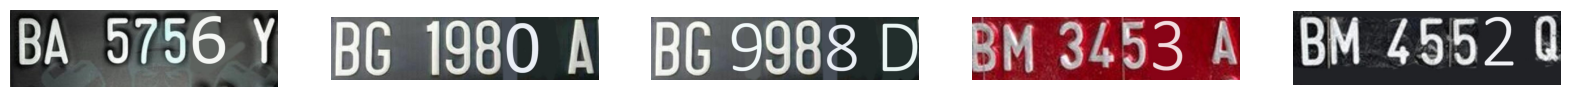

In [2]:
from google.colab import drive
drive.mount('/content/drive')


data = []

def plot_image(data):
    fig, ax = plt.subplots(1, 5, figsize=(20, 20))

    for i in range(len(data)):
        ax[i].imshow(data[i])
        ax[i].axis('off')

    plt.show()

for i in range(1, 6):
  img = cv.imread('/content/drive/MyDrive/machine-learning/img/' + str(i) + '.jpg', cv.IMREAD_COLOR)
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  data.append(img_rgb)

plot_image(data)

### 2. Melakukan Peningkatan Kualitas Gambar

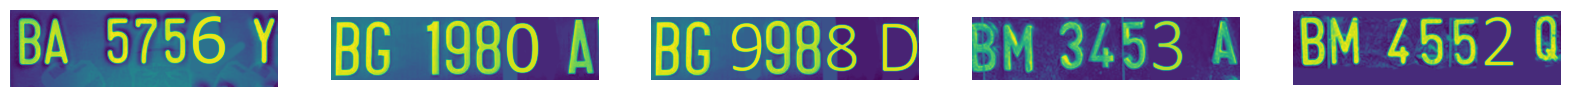

In [3]:
import cv2 as cv
import numpy as np

def increase_contrast_and_clarity(img):
    # Ubah gambar menjadi grayscale
    gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # Terapkan filter median untuk mengurangi noise
    denoised_img = cv.GaussianBlur(gray_img, (5, 5), 0)  # 5x5 adalah ukuran kernel Gaussian, dapat disesuaikan

    return denoised_img

data_increased = []

for img_rgb in data:
    # Peningkatan kontras dan kejelasan
    increased_img = increase_contrast_and_clarity(img_rgb)
    data_increased.append(increased_img)


plot_image(data_increased)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


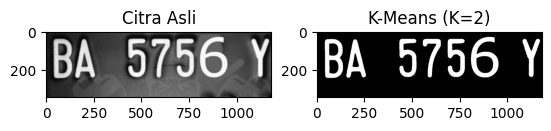

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


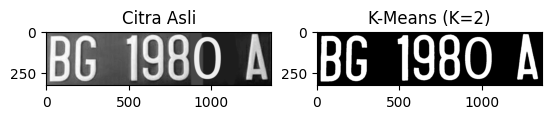

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


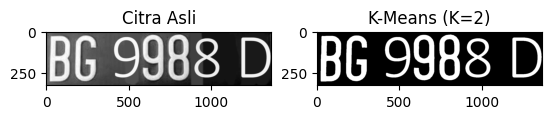

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


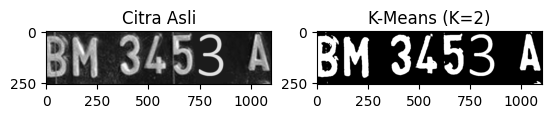

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


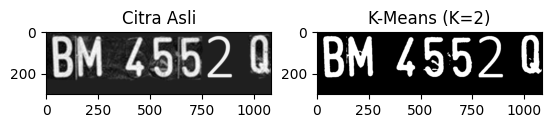

Rata-rata MSE: 644.9459796186131
Rata-rata SSIM: 0.7562244693519452


In [4]:
import cv2 as cv
import numpy as np
from sklearn.cluster import KMeans  # Untuk K-Means clustering
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim
from sklearn.metrics import mean_squared_error

# Inisialisasi variabel untuk menyimpan total MSE dan total SSIM
total_mse = 0
total_ssim = 0

def kmeans_segmentation(image, num_clusters):
    reshaped_image = image.reshape((-1, 1))
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(reshaped_image)
    segmented_image = kmeans.cluster_centers_[kmeans.labels_]
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

num_clusters = 2

for img in data_increased:
    segmented_img = kmeans_segmentation(img, num_clusters)

    # Menghitung MSE
    mse = mean_squared_error(img, segmented_img)

    # Menghitung SSIM
    ssim = compare_ssim(img, segmented_img)

    total_mse += mse
    total_ssim += ssim

    # Tampilkan citra asli
    plt.subplot(1, 2, 1)
    plt.title('Citra Asli')
    plt.imshow(img, cmap='gray')

    # Tampilkan hasil segmentasi
    plt.subplot(1, 2, 2)
    plt.title(f'K-Means (K={num_clusters})')
    plt.imshow(segmented_img, cmap='gray')

    plt.show()

# Menghitung rata-rata MSE dan SSIM
avg_mse = total_mse / len(data_increased)
avg_ssim = total_ssim / len(data_increased)

print(f"Rata-rata MSE: {avg_mse}")
print(f"Rata-rata SSIM: {avg_ssim}")

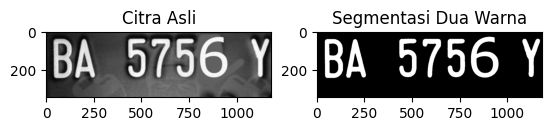

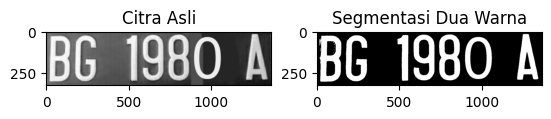

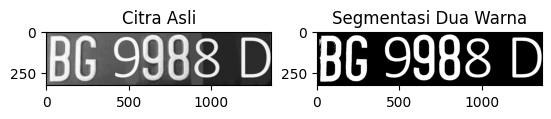

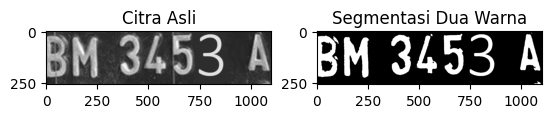

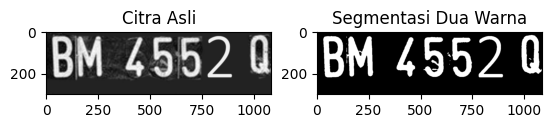

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def two_color_segmentation(image, threshold_value):
    # Lakukan operasi thresholding untuk menghasilkan citra biner
    _, segmented_img = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    return segmented_img

for img in data_increased:
    threshold_value = 128  # Ambil nilai ambang sesuai kebutuhan
    segmented_img = two_color_segmentation(img, threshold_value)

    # Tampilkan citra asli
    plt.subplot(1, 2, 1)
    plt.title('Citra Asli')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray')

    # Tampilkan hasil segmentasi dua warna
    plt.subplot(1, 2, 2)
    plt.title('Segmentasi Dua Warna')
    plt.imshow(segmented_img, cmap='gray')

    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


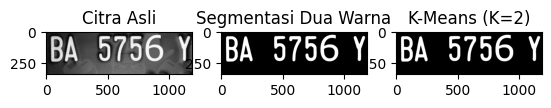

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


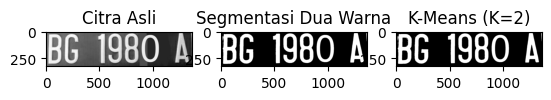

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


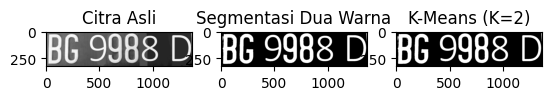

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


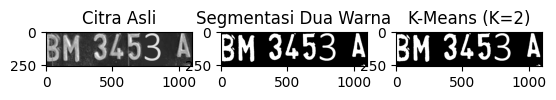

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


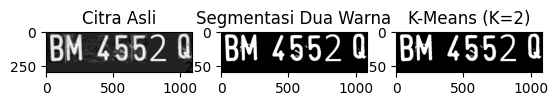

Rata-rata MSE: 8460.28230991542
Rata-rata SSIM: 0.35511402482526505


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Inisialisasi variabel untuk menyimpan total MSE dan total SSIM
total_mse = 0
total_ssim = 0

def kmeans_on_binary_segmentation(binary_image, num_clusters):
    # Ubah citra biner menjadi array 1D
    reshaped_image = binary_image.reshape(-1, 1)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(reshaped_image)
    segmented_image = kmeans.cluster_centers_[kmeans.labels_]
    segmented_image = segmented_image.reshape(binary_image.shape)
    return segmented_image
    return segmented_image

for img in data_increased:
    threshold_value = 128  # Nilai ambang sesuai kebutuhan
    binary_segmented_img = two_color_segmentation(img, threshold_value)

    num_clusters = 2  # Jumlah cluster yang diinginkan dalam K-Means

    # Proses citra biner dengan K-Means
    segmented_img_kmeans = kmeans_on_binary_segmentation(binary_segmented_img, num_clusters)

    # Menghitung MSE
    mse = mean_squared_error(img, segmented_img_kmeans)

    # Menghitung SSIM
    ssim = compare_ssim(img, segmented_img_kmeans)

    total_mse += mse
    total_ssim += ssim

    total_mse += mse
    total_ssim += ssim

    # Tampilkan citra asli
    plt.subplot(1, 3, 1)
    plt.title('Citra Asli')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray')

    # Tampilkan hasil segmentasi dua warna
    plt.subplot(1, 3, 2)
    plt.title('Segmentasi Dua Warna')
    plt.imshow(binary_segmented_img, cmap='gray')

    # Tampilkan hasil segmentasi K-Means pada citra biner dengan latar belakang hitam
    plt.subplot(1, 3, 3)
    plt.title(f'K-Means (K={num_clusters})')
    plt.imshow(segmented_img_kmeans, cmap='gray')

    plt.show()

# Menghitung rata-rata MSE dan SSIM
avg_mse = total_mse / len(data_increased)
avg_ssim = total_ssim / len(data_increased)

print(f"Rata-rata MSE: {avg_mse}")
print(f"Rata-rata SSIM: {avg_ssim}")